## Questions
* How to choose lag parameter for autoreg? 
* How to choose number of future days to predict for? 

In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv("./datasets/bike_data.csv", index_col=0)

## Train/Test Split

The train test split for time series models is probably different than how we will split for the regression models. In this case. 


In [9]:
X = df.drop("Count",axis=1)
y = df["Count"]

# Split datset without shuffling
# First 70 % of data is train
# Next 30 % of data is test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [10]:
# AR example: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset
data = y_train
# fit model
model = AutoReg(data, lags=168)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data) + 24)

/Users/rekhathomas/opt/miniconda3/envs/ML/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [4]:
# See the r squared values on training data
from sklearn.metrics import r2_score
r2_score(y_train[168:], model_fit.predict()[168:])

0.9387789231474055

In [20]:
# First week of testing data
from sklearn.metrics import r2_score

N = 200 # Number of days in test to predict 168 is 1 week
y_pred = model_fit.predict(len(data), len(data) + N -1)

r2_score(y_test[:N], y_pred)

0.713045004385503

## Visualize prediction for one week out 

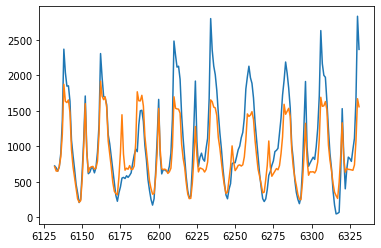

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(y_test[:N])
plt.plot(y_pred)
plt.show()

In [67]:
# Trying out the select_order to determine the best lag values
from statsmodels.tsa.ar_model import ar_select_order
mod = ar_select_order(y_train, maxlag=200)
mod.ar_lags

/Users/rekhathomas/opt/miniconda3/envs/ML/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
/Users/rekhathomas/opt/miniconda3/envs/ML/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171])

In [ ]:
# Simulate a situation where we would train on all past data and then predict the next month 